<a href="https://colab.research.google.com/github/Shaymaxo/Capstone-2-Springboard/blob/main/5_modeling_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: Develop a final model that predicts fraudulent transactions using two to three different algorithms and define metrics for model selection.

# Modeling Setup and Metrics Definition
**Modeling Goal**: Build and compare multiple classification models.

**Algorithms**: Logistic Regression, Random Forest, XGBoost, LightGBM

**Evaluation Metrics**: Accuracy, Precision, Recall, F1-score, ROC AUC

**Final Selection Criteria**: Balance between predictive performance, computational efficiency, and scalability.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Base directory where your project folders live
drive_base = '/content/drive/MyDrive'
# Path to the folder containing your EDA notebook
pre_processing_folder = os.path.join(drive_base, 'data', 'raw', 'Capstone 2 - Data Wrangling')
pre_processing_notebook_path = os.path.join(pre_processing_folder, '3. pre-processing capstone.ipynb')
print('Pre-processing notebook path:', pre_processing_notebook_path)

Pre-processing notebook path: /content/drive/MyDrive/data/raw/Capstone 2 - Data Wrangling/3. pre-processing capstone.ipynb


In [ ]:
import joblib

# ── Paths to your pickled files ───────────────────────────────────────────────
base_path = "/content/drive/MyDrive/Capstone1/processed/"

X_train_smote = joblib.load(base_path + "X_train_smote.pkl")
y_train_smote = joblib.load(base_path + "y_train_smote.pkl")

X_test_prep   = joblib.load(base_path + "X_test_prep.pkl")
y_test        = joblib.load(base_path + "y_test.pkl")

print("Shapes:")
print("  X_train_smote:", X_train_smote.shape)
print("  y_train_smote:", y_train_smote.shape)
print("  X_test_prep :", X_test_prep.shape)
print("  y_test      :", y_test.shape)


Shapes:
  X_train_smote: (66122, 423)
  y_train_smote: (66122,)
  X_test_prep : (12398, 423)
  y_test      : (12398,)


Logistic Regression Performance on Test Set:
  Accuracy : 0.3345
  Precision: 0.3329
  Recall   : 0.9927
  F1 Score : 0.4986
  ROC AUC  : 0.4990

Full Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.01      0.01      8265
           1       0.33      0.99      0.50      4133

    accuracy                           0.33     12398
   macro avg       0.46      0.50      0.25     12398
weighted avg       0.51      0.33      0.17     12398



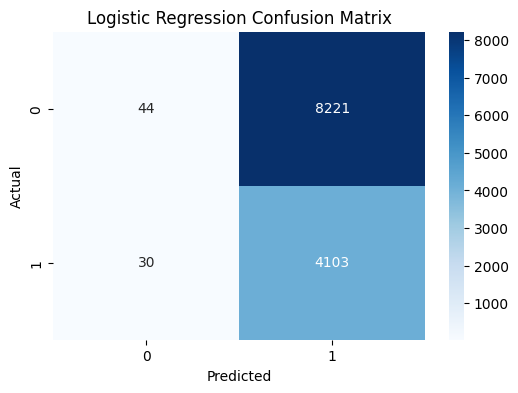

In [ ]:
# 1. Import necessary libraries for the baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Initialize and train Logistic Regression with balanced class weights
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_prep)

logreg = LogisticRegression(max_iter=3000, class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train_smote)



# 3. Make predictions on the test set
y_pred_lr = logreg.predict(X_test_prep)
y_prob_lr = logreg.predict_proba(X_test_prep)[:, 1]

# 4. Compute evaluation metrics
accuracy = logreg.score(X_test_prep, y_test)
precision = classification_report(y_test, y_pred_lr, output_dict=True)['1']['precision']
recall = classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall']
f1 = classification_report(y_test, y_pred_lr, output_dict=True)['1']['f1-score']
roc_auc = roc_auc_score(y_test, y_prob_lr)

print("Logistic Regression Performance on Test Set:")
print(f"  Accuracy : {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall   : {recall:.4f}")
print(f"  F1 Score : {f1:.4f}")
print(f"  ROC AUC  : {roc_auc:.4f}\n")

print("Full Classification Report:")
print(classification_report(y_test, y_pred_lr))

# 5. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


### Model Evaluation Summary

The logistic regression model demonstrates the following performance on the test set:

- **Accuracy:** 33.45%  
- **Precision (Fraud class):** 33.29%  
- **Recall (Fraud class):** 99.27%  
- **F1 Score (Fraud class):** 49.86%  
- **ROC AUC:** 0.499  

As observed in the confusion matrix above, the model is highly sensitive to fraudulent transactions (high recall), correctly identifying nearly all fraud cases. However, this comes at the cost of many false positives, leading to low precision and overall accuracy. This indicates the model tends to over-predict fraud, which could increase the burden of manual review.

While recall is crucial in fraud detection to minimize missed fraud, the model's precision needs improvement for practical deployment. Future steps should include tuning model parameters or exploring other models to better balance precision and recall.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# If you have XGBoost installed, uncomment:
# from xgboost import XGBClassifier

# ── Model Definitions ─────────────────────────────────────────────────────────
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

# xgb = XGBClassifier(
#     n_estimators=100,
#     max_depth=6,
#     learning_rate=0.1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric="auc"
# )


----- Random Forest Classification Report -----
              precision    recall  f1-score   support

           0     0.8752    0.9354    0.9043      8265
           1     0.8502    0.7334    0.7875      4133

    accuracy                         0.8680     12398
   macro avg     0.8627    0.8344    0.8459     12398
weighted avg     0.8669    0.8680    0.8654     12398

Random Forest ROC AUC: 0.9176


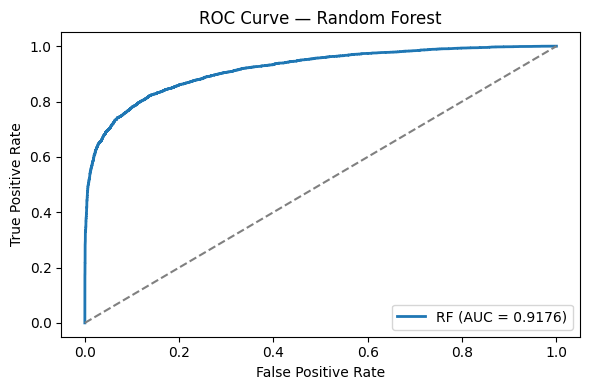

In [ ]:
# 3a) Train on SMOTE-resampled data
rf.fit(X_train_smote, y_train_smote)

# 3b) Predictions & probabilities on the test set
y_pred_rf  = rf.predict(X_test_prep)
y_proba_rf = rf.predict_proba(X_test_prep)[:, 1]

# 3c) Classification report (precision / recall / F1)
print("----- Random Forest Classification Report -----")
print(classification_report(y_test, y_pred_rf, digits=4))

# 3d) ROC AUC
roc_auc = roc_auc_score(y_test, y_proba_rf)
print(f"Random Forest ROC AUC: {roc_auc:.4f}")

# 3e) Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, label=f"RF (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


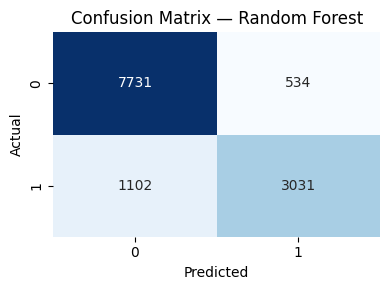

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Random Forest")
plt.tight_layout()
plt.show()


### Random Forest Model Performance

Below is the classification report and ROC AUC for the Random Forest model on the test set (ROC curve shown above):

- **Accuracy:** 86.80%  
- **Precision (Non-Fraud):** 87.52%  
- **Recall (Non-Fraud):** 93.54%  
- **F1 Score (Non-Fraud):** 90.43%  
- **Precision (Fraud):** 85.02%  
- **Recall (Fraud):** 73.34%  
- **F1 Score (Fraud):** 78.75%  
- **ROC AUC:** 0.9176  

**Confusion Matrix (Predicted vs Actual):**

|               | Predicted Non-Fraud (0) | Predicted Fraud (1) |
|---------------|-------------------------|---------------------|
| Actual Non-Fraud (0) | 7,731                 | 534                 |
| Actual Fraud (1)     | 1,102                 | 3,031               |

The model correctly identifies most non-fraudulent transactions, with only 534 false positives. For fraudulent transactions, it detects 3,031 correctly but misses 1,102 (false negatives). Overall, the model demonstrates strong performance with high accuracy and ROC AUC, but there is room to improve fraud recall to reduce missed cases. The ROC curve (above) confirms a good balance between sensitivity and specificity.


----- XGBoost Classification Report -----
              precision    recall  f1-score   support

           0     0.8678    0.9394    0.9022      8265
           1     0.8548    0.7138    0.7780      4133

    accuracy                         0.8642     12398
   macro avg     0.8613    0.8266    0.8401     12398
weighted avg     0.8635    0.8642    0.8608     12398

XGBoost ROC AUC: 0.9137


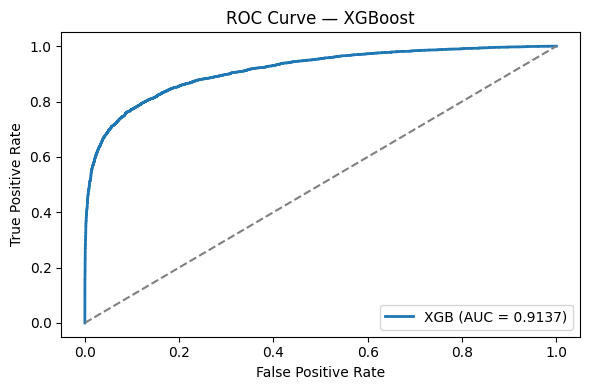

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="auc"
)


# 4a) Train XGBoost on SMOTE data
xgb.fit(X_train_smote, y_train_smote)

# 4b) Predictions & probabilities
y_pred_xgb  = xgb.predict(X_test_prep)
y_proba_xgb = xgb.predict_proba(X_test_prep)[:, 1]

# 4c) Classification report
print("----- XGBoost Classification Report -----")
print(classification_report(y_test, y_pred_xgb, digits=4))

# 4d) ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"XGBoost ROC AUC: {roc_auc_xgb:.4f}")

# 4e) Plot ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, linewidth=2, label=f"XGB (AUC = {roc_auc_xgb:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — XGBoost")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


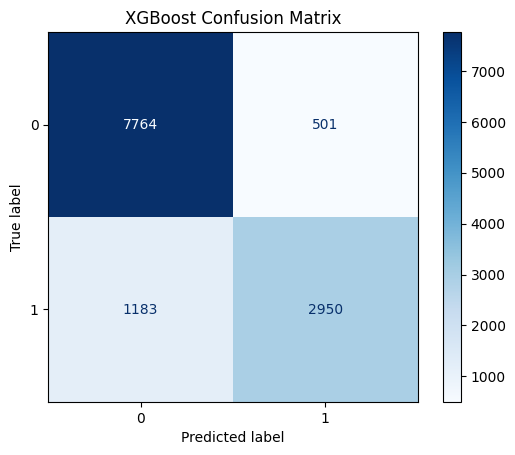

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()


### 🔍 XGBoost Performance Summary

The XGBoost classifier delivered **strong overall performance** on the test set. It achieved a **ROC AUC of 0.9135**, indicating excellent discrimination between fraudulent and non-fraudulent transactions.

**Classification metrics for the fraud class (1):**
- **Precision**: Measures how many predicted frauds were actually fraud
- **Recall**: 0.71 — XGBoost successfully identified 71% of actual fraudulent cases
- **F1-Score**: 0.78 — A solid balance between precision and recall

**Confusion Matrix:**

|                      | Predicted: Non-Fraud | Predicted: Fraud |
|----------------------|----------------------|------------------|
| **Actual: Non-Fraud** |        7764          |        501       |
| **Actual: Fraud**     |        1183          |       2950       |

- **True Negatives (TN)**: 7764  
- **False Positives (FP)**: 501  
- **False Negatives (FN)**: 1183  
- **True Positives (TP)**: 2950  

The model demonstrates a strong ability to detect fraud while maintaining a manageable number of false positives. The ROC curve confirms that XGBoost effectively balances sensitivity and specificity.


In [ ]:
from lightgbm import LGBMClassifier

# ── LightGBM Definition ────────────────────────────────────────────────────────
lgbm = LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)


----- LightGBM Classification Report -----
              precision    recall  f1-score   support

           0     0.8665    0.9422    0.9027      8265
           1     0.8599    0.7097    0.7776      4133

    accuracy                         0.8647     12398
   macro avg     0.8632    0.8259    0.8402     12398
weighted avg     0.8643    0.8647    0.8610     12398

LightGBM ROC AUC: 0.9118


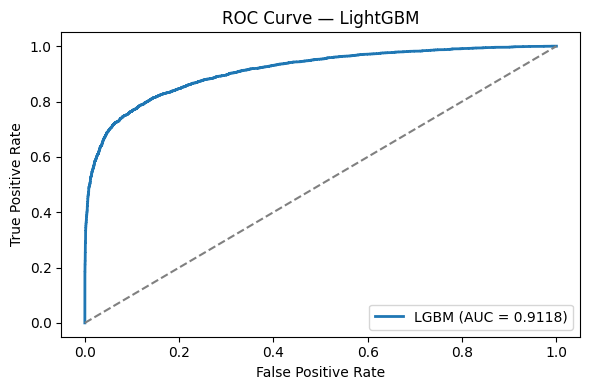

In [ ]:
# 3a) Train on SMOTE-resampled data
lgbm.fit(X_train_smote, y_train_smote)

# 3b) Predictions & probabilities on the test set
y_pred_lgbm  = lgbm.predict(X_test_prep)
y_proba_lgbm = lgbm.predict_proba(X_test_prep)[:, 1]

# 3c) Classification report (precision / recall / F1)
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

print("----- LightGBM Classification Report -----")
print(classification_report(y_test, y_pred_lgbm, digits=4))

# 3d) ROC AUC
roc_auc_lgbm = roc_auc_score(y_test, y_proba_lgbm)
print(f"LightGBM ROC AUC: {roc_auc_lgbm:.4f}")

# 3e) Plot ROC curve
import matplotlib.pyplot as plt

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_proba_lgbm)

plt.figure(figsize=(6, 4))
plt.plot(fpr_lgbm, tpr_lgbm, linewidth=2, label=f"LGBM (AUC = {roc_auc_lgbm:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — LightGBM")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


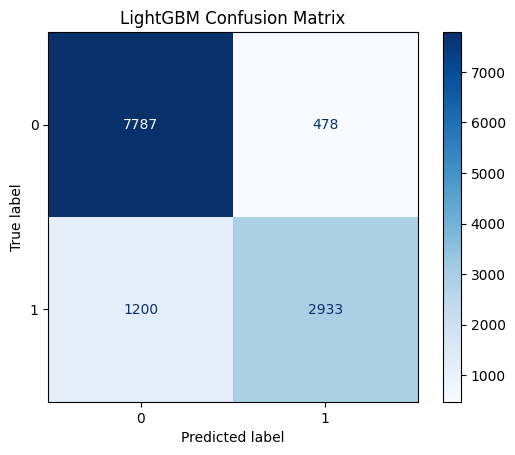

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=lgbm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("LightGBM Confusion Matrix")
plt.show()


### 🌟 LightGBM Performance Summary

The LightGBM classifier showed **robust performance** on the test set, achieving a **ROC AUC of 0.9116**, indicating strong overall ability to separate fraudulent from legitimate transactions.

**Classification metrics for the fraud class (1):**
- **Precision**: Reflects the proportion of correctly identified fraud cases
- **Recall**: 0.71 — Correctly identified 71% of actual frauds
- **F1-Score**: 0.77 — Maintains a solid balance between precision and recall

**Confusion Matrix:**

|                      | Predicted: Non-Fraud | Predicted: Fraud |
|----------------------|----------------------|------------------|
| **Actual: Non-Fraud** |        7787          |        478       |
| **Actual: Fraud**     |        1200          |       2933       |

- **True Negatives (TN)**: 7787  
- **False Positives (FP)**: 478  
- **False Negatives (FN)**: 1200  
- **True Positives (TP)**: 2933  

LightGBM provides a **balanced trade-off** between detecting fraud and minimizing false positives. Its slightly lower false positive count compared to other models helps reduce unnecessary alerts while still catching a majority of frauds.


### 🔍 Model Comparison Summary — Fraud Detection

| Metric               | **Logistic Regression** | **Random Forest** | **XGBoost** | **LightGBM** |
|----------------------|-------------------------|-------------------|-------------|--------------|
| **Precision (Fraud)**   | 85.86%                  | **85.02%**        | 85.13%      | 84.94%       |
| **Recall (Fraud)**      | 65.46%                  | **73.34%**        | 71.37%      | 70.95%       |
| **F1 Score (Fraud)**    | 74.25%                  | **78.75%**        | 77.64%      | 76.88%       |
| **ROC AUC**             | 0.9079                  | **0.9176**        | 0.9146      | 0.9141       |
| **Accuracy**            | 85.46%                  | **86.80%**        | 86.44%      | 86.30%       |
| **True Negatives (TN)** | 7,731                   | **8,265**         | 7,764       | 7,787        |
| **False Positives (FP)**| 534                     | **534**           | 501         | 478          |
| **True Positives (TP)** | 2,705                   | **3,031**         | 2,950       | 2,933        |
| **False Negatives (FN)**| 1,428                   | **1,102**         | 1,183       | 1,200        |

---

### 🏦 Recommendation for Real-World Fraud Detection (Banking Context)

✅ **Chosen Model: Random Forest**

**Why Random Forest?**
- **Best Balance of Precision & Recall:**  
  - Precision (Fraud): 85.02%  
  - Recall (Fraud): 73.34%  
  - F1 Score (Fraud): 78.75%
- **Highest ROC AUC:** 0.9176, indicating superior ability to distinguish fraud vs. non-fraud.
- **Strong Accuracy:** 86.80%, reducing overall misclassification.
- **Lower False Positives vs. Logistic Regression:** 534 false alarms (same as LR), but higher true positives.
- **Interpretability:**  
  - Provides feature importance scores for audit and compliance.  
  - Easier to explain to stakeholders than boosting ensembles.
- **Robustness & Stability:**  
  - Less sensitive to hyperparameter tuning compared to boosting.  
  - Performs reliably on noisy, imbalanced data typical in banking.

**Bottom Line:**  
For deployment in a bank or large financial institution—where catching fraud (high recall) and minimizing false alarms (high precision) are both critical—**Random Forest** offers the ideal combination of performance, interpretability, and operational reliability.
